## Widgets and Interaction

In [4]:
!conda install -y netcdf4

Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /Users/Niall/anaconda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-env-2.6.0            |                0          601 B
    hdf4-4.2.12                |                0         642 KB
    libnetcdf-4.4.1            |                0         868 KB
    netcdf4-1.2.4              |      np111py35_1         468 KB
    conda-4.3.6                |           py35_0         488 KB
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    hdf4:      4.2.12-0                     
    libnetcdf: 4.4.1-0                      
    netcdf4:   1.2.4-np111py35_1            

The following packages will be UPDATED:

    conda:     4.2.13-py35_0 

In [6]:
from netCDF4 import Dataset, num2date, date2num
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from ipywidgets import interact, interactive, fixed

In [11]:
import ipywidgets as widgets

In [12]:
x=linspace(0,1,100)
f=2

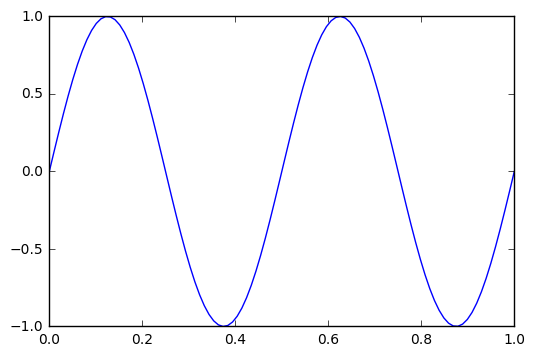

In [13]:
plt.plot(x, sin(2*pi*x*f))

In [26]:
def pltsin(f, a):
    plt.plot(x,sin(2*pi*x*f)*a)

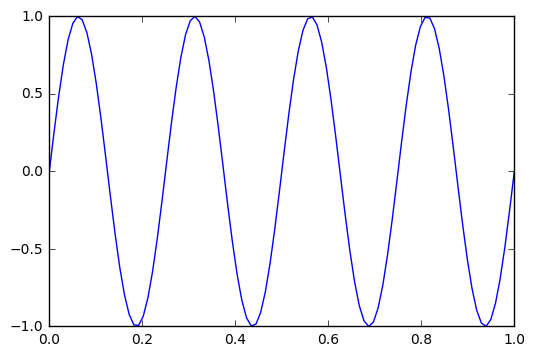

In [24]:
pltsin(4, 2)

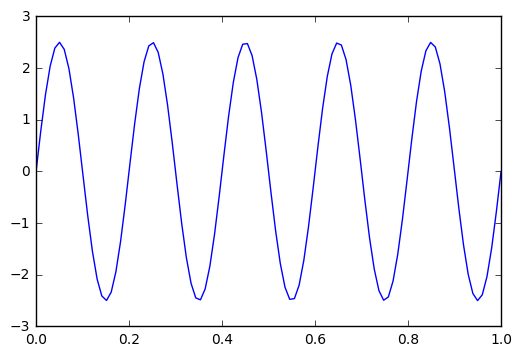

In [27]:
interact(pltsin, f=(1,10,0.1), a=(-4,4,0.5))

## Climate data

In [28]:
f=Dataset('ncep-data/air.sig995.2013.nc')

In [30]:
air=f.variables['air'] #get variable

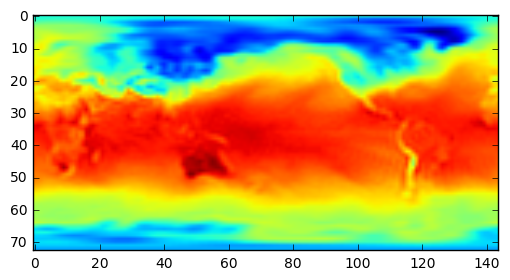

In [31]:
plt.imshow(air[0,:,:]) #display first timestep

In [32]:
#Create a function to browse through the days

def sh(time):
    plt.imshow(air[time,:,:])

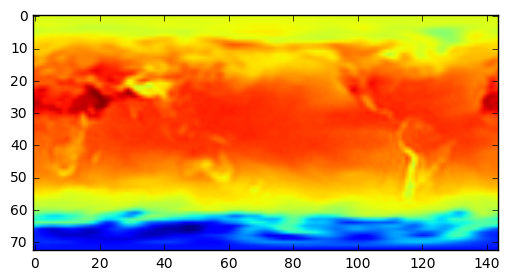

In [33]:
interact(sh, time=(0, 365, 1))

In [39]:
#Browse variable

def sh(var="air", year="2013", time=0):
    f=Dataset('ncep-data/'+var+'.sig995.'+year+'.nc')
    vv=f.variables[var]
    plt.imshow(vv[time,:,:])

In [40]:
# Give a list of variables

variabs = ['air', 'uwnd', 'vwnd', 'rhum']
years = ['2013', '2014', '2015']

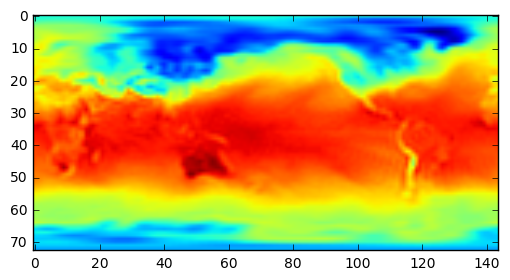

In [41]:
#Now interact with it

interact(sh, time=(0, 365, 1), var=variabs, years=years)